In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = pd.DataFrame(test['id'])
test_ids = test_ids.reset_index(drop = True)

In [20]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,8/20/11,43,27,4,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,8/23/11,34,19,3,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,8/27/11,43,29,2,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,9/1/11,89,50,9,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,9/5/11,77,77,4,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 68.1+ MB


In [22]:
#list columns that contain NaN values

train.isnull().sum()[train.isnull().sum() >= 1]

life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
preschool_quota                           6688
school_quota                              6685
hospital_beds_raion                      14441
raion_build_count_with_material_info      4991
build_count_block                         4991
build_count_wood                          4991
build_count_frame                         4991
build_count_brick                         4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_foam                          4991
build_count_slag                          4991
build_count_mix                           4991
raion_build_c

In [23]:
#drop columns with NaN values for now, will populate later

del train['life_sq']
del train['floor']
del train['max_floor']
del train['material']
del train['build_year']
del train['num_room']
del train['kitch_sq']
del train['state']
del train['preschool_quota']
del train['school_quota']
del train['hospital_beds_raion']
del train['raion_build_count_with_material_info']
del train['build_count_block']
del train['build_count_wood']
del train['build_count_frame']
del train['build_count_brick']
del train['build_count_monolith']
del train['build_count_panel']
del train['build_count_foam']
del train['build_count_slag']
del train['build_count_mix']
del train['raion_build_count_with_builddate_info']
del train['build_count_before_1920']
del train['build_count_1921-1945']
del train['build_count_1946-1970']
del train['build_count_1971-1995']
del train['build_count_after_1995']
del train['metro_min_walk']
del train['metro_km_walk']
del train['railroad_station_walk_km']
del train['railroad_station_walk_min']
del train['ID_railroad_station_walk']
del train['cafe_sum_500_min_price_avg']
del train['cafe_sum_500_max_price_avg']
del train['cafe_avg_price_500']
del train['cafe_sum_1000_min_price_avg']
del train['cafe_sum_1000_max_price_avg']
del train['cafe_avg_price_1000']
del train['cafe_sum_1500_min_price_avg']
del train['cafe_sum_1500_max_price_avg']
del train['cafe_avg_price_1500']
del train['cafe_sum_2000_min_price_avg']
del train['cafe_sum_2000_max_price_avg']
del train['cafe_avg_price_2000']
del train['cafe_sum_3000_min_price_avg']
del train['cafe_sum_3000_max_price_avg']
del train['cafe_avg_price_3000']
del train['prom_part_5000']
del train['cafe_sum_5000_min_price_avg']
del train['cafe_sum_5000_max_price_avg']
del train['cafe_avg_price_5000']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Columns: 241 entries, id to price_doc
dtypes: float64(68), int64(157), object(16)
memory usage: 56.3+ MB


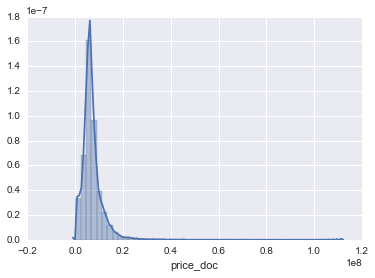

In [24]:
#price distribution

sns.distplot(train['price_doc'])

In [32]:
#train test split

df = train
X, y = df.drop('price_doc', axis = 1), df['price_doc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [6]:
train['price_doc'].median()

6274411.0

In [7]:
#null accuracy submission

test_ids['price_doc'] = 6274411

result = test_ids
result.head()

,id,price_doc
0,30474,6274411
1,30475,6274411
2,30476,6274411
3,30477,6274411
4,30478,6274411


In [39]:
result.to_csv('submission.csv', sep = ',', index = False)